#Análise de Ocorrência de Câncer de Boca



## 1 - Introdução
O câncer da boca (também conhecido como câncer de lábio e cavidade oral) é um tumor maligno que afeta os lábios e as estruturas da boca, como gengivas, bochechas, céu da boca (palato), língua (principalmente as bordas) e a região embaixo da língua (assoalho da boca). É o quinto tumor mais frequente em homens no Brasil. A maioria dos casos é diagnosticada em estágios avançados.
A detecção dessa doença no estágio inicial é muitas vezes negligenciada pela ausência de dores fortes, falta de conscientização ou mesmo sintomas iniciais inespecíficos.

Em todo o mundo, 300.000 casos de câncer de boca ocorrem anualmente, sendo responsável por quase 130.000 mortes todos os anos, configurando-se em um problema de saúde pública global. No Brasil, a incidência do câncer bucal é considerada uma das mais altas do mundo. O Instituto Nacional de Câncer (INCA) estima que, em 2014, no Brasil, ocorreram 15.290 novos casos da doença; na Região Nordeste, o número estimado é de 3.020 novos casos.

### Motivação

Pelo seu alto grau de mortalidade e baixo nível de detecção em estágio incial, um maior aprofundamento sobre dados relacionados a pacientes com câncer de boca se faz necessário. Através disso, pode-se estipular relacionamentos sobre fatores individuais que podem contribuir para a prevenção da doença.

### Proposta

A proposta do presente trabalho é, através de um banco de dados sobre pacientes diagnosticados ou não com câncer de boca, realizar uma melhor exploração de suas características e hábitos individuais, a fim de se responder 3 perguntas:
 - Há relação entre câncer de boca e tabagismo?
 - O tamanho do tumor indica a sua malignidade?
 - Como utilizar o banco de dados para a previsão de diagnóstico de câncer de boca?

Trata-se de um problema de classificação supervisionado.

 ### Banco de Dados Utilizado
 O Banco de dados utilizado no nosso estudo encontra-se no repositório da plataforma Kaggle, através do link https://www.kaggle.com/datasets/ankushpanday2/oral-cancer-prediction-dataset . Consiste de 25 colunas, que são:
  - ID – Identificador único
  - Country – Nome do país
  - Age – Idade do indivíduo
  - Gender – Masculino/Feminino
  - Tobacco Use – Usuário de tabaco
  - Alcohol Consumption – Consumo de álcool
  - HPV Infection – Infecção de HPV
  - Betel Quid Use (Betel Quid) – Consumo de Nogueira-de-Betel
  - Chronic Sun Exposure  – Exposição Solar Crônica
  - Poor Oral Hygiene – Higiene oral pobre
  - Diet (Fruits & Vegetables Intake) – Dieta (Frutas e Vegetais)
  - Family History of Cancer – Hstórico de câncer na família
  - Compromised Immune System – Sistema imune comprometido
  - Oral Lesions – Lesões na boca
  - Unexplained Bleeding – Snagramento não explicado
  - Difficulty Swallowing – Dificuldade em engolir
  - White or Red Patches in Mouth – Manchas Brancas ou Vermelhas na Boca
  - Tumor Size (cm) – tamanho do tumor
  - Cancer Stage – 0 (Sem Câncer), 1, 2, 3, 4
  - Treatment Type – Tipo de tratamento - Cirurgia/Radiação/Quimioterapia/Terapia Alvo/Sem Tratamento
  - Survival Rate (5-Year, %)
  - Cost of Treatment (USD) -  Custo do tratamento
  - Economic Burden - Carga Econômica (Dias de Trabalho Perdidos por Ano) - (Dias de Trabalho Perdidos por Ano)
  - Early Diagnosis - Diagnóstico precoce
  - Oral Cancer (Diagnosis) – Diaqnóstico de Câncer oral (Variável-Alvo)

### Metodologia
Primeiramente, iremos explorar o nosso banco de dados e suas dimensões. Em seguida, iremos explorar os seus dados e verificar alguma relação entre eles. Depois, verificaremos a necessidade pré-processamento e, finalmente, iremos adequar o bando de dados a algoritmo de predição,


## 2 - Carregando bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## 3 - Carregando o Banco de Dados

Os dados que podem ser encontrados no Kaggle foram adicionados ao meu github, desse modo utilizei ele para ser o repositório deste trabalho.

In [2]:
github_csv_url = 'https://raw.githubusercontent.com/asterixogaules/PosGrad/main/oral_cancer_prediction_dataset.csv'

df = pd.read_csv(github_csv_url, delimiter=',')

Após o carregamento podemos verificar a existência de dados categóricos e numéricos.

In [3]:
df.head()

,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,...,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,1,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,No,No
1,2,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,...,No,No,1.782186,1,No Treatment,83.340103,77772.50,177,No,Yes
2,3,UK,37,Female,No,Yes,No,No,Yes,Yes,...,No,Yes,3.523895,2,Surgery,63.222871,101164.50,130,Yes,Yes
3,4,Sri Lanka,55,Male,Yes,Yes,No,Yes,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
4,5,South Africa,68,Male,No,No,No,No,No,Yes,...,No,No,2.834789,3,No Treatment,44.293199,45354.75,52,No,Yes


In [4]:
df.tail()

,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,...,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
84917,84918,USA,46,Male,Yes,No,No,No,No,Yes,...,No,Yes,0.000000,0,No Treatment,100.000000,0.0,0,Yes,No
84918,84919,USA,41,Male,Yes,Yes,No,No,No,No,...,Yes,Yes,0.000000,0,No Treatment,100.000000,0.0,0,Yes,No
84919,84920,Taiwan,72,Male,Yes,Yes,No,Yes,No,Yes,...,No,No,4.777394,1,Surgery,85.633426,81352.5,90,No,Yes
84920,84921,Japan,67,Male,Yes,No,No,No,No,No,...,Yes,No,0.000000,0,No Treatment,100.000000,0.0,0,Yes,No
84921,84922,Pakistan,75,Male,Yes,No,No,Yes,Yes,No,...,No,No,0.000000,0,No Treatment,100.000000,0.0,0,No,No


Através da biblioteca pandas, podemos verificar as principais informações do banco de dados, que praticamente se divide entre int64(float), float64(float) e object.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84922 entries, 0 to 84921
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        84922 non-null  int64  
 1   Country                                   84922 non-null  object 
 2   Age                                       84922 non-null  int64  
 3   Gender                                    84922 non-null  object 
 4   Tobacco Use                               84922 non-null  object 
 5   Alcohol Consumption                       84922 non-null  object 
 6   HPV Infection                             84922 non-null  object 
 7   Betel Quid Use                            84922 non-null  object 
 8   Chronic Sun Exposure                      84922 non-null  object 
 9   Poor Oral Hygiene                         84922 non-null  object 
 10  Diet (Fruits & Vegetables Intake) 

Em seguida nós realizamos a estatística das variáveis numéricas. Note que a variável ID não é relevante pois trata-se apenas de um identificador de linhas desse dataframe. Entretanto, podemos ver que a média de idade indica mais pessoas acima de 50 anos presente nos dados.

In [6]:
df.describe()

,ID,Age,Tumor Size (cm),Cancer Stage,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year)
count,84922.000000,84922.000000,84922.000000,84922.000000,84922.000000,84922.000000,84922.000000
mean,42461.500000,54.509444,1.747294,1.118756,79.503364,39109.881244,52.028391
std,24515.014117,10.014839,2.028199,1.340418,26.483746,44710.687054,60.389796
min,1.000000,15.000000,0.000000,0.000000,10.000750,0.000000,0.000000
25%,21231.250000,48.000000,0.000000,0.000000,65.233425,0.000000,0.000000
50%,42461.500000,55.000000,0.000000,0.000000,100.000000,0.000000,0.000000
75%,63691.750000,61.000000,3.480075,2.000000,100.000000,76468.437500,104.000000
max,84922.000000,101.000000,5.999899,4.000000,100.000000,159988.000000,179.000000


## 4 - Visualização dos Dados

Incialmente, vamos verificar algumas quantidades, como o número de pessoas diagnosticadas e não diagnosticadas com câncer. Além disso, verificaremos a quantidade de pessoas por gênero, para ver se a quantidade de homens e mulheres está equilibrada.

In [7]:
# distribuição das classes
print(df.groupby('Oral Cancer (Diagnosis)').size())


Oral Cancer (Diagnosis)
No     42573
Yes    42349
dtype: int64


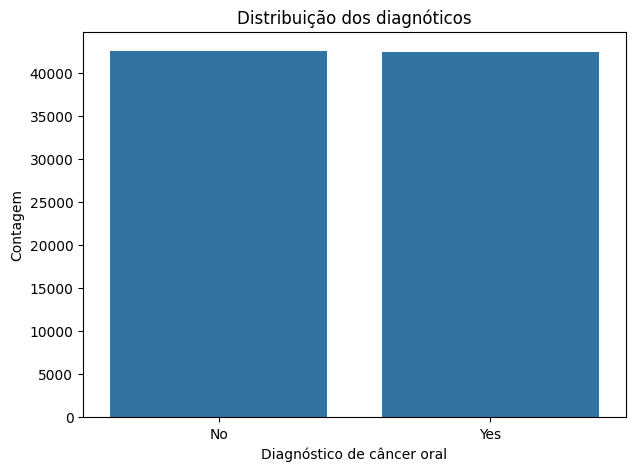

In [8]:
plt.figure(figsize=(7, 5))
# gráfico de barras simples
sns.countplot(x='Oral Cancer (Diagnosis)', data=df)
plt.title('Distribuição dos diagnóticos')
plt.xlabel('Diagnóstico de câncer oral')
plt.ylabel('Contagem')
plt.show()

In [9]:
# distribuição das classes
print(df.groupby('Gender').size())

Gender
Female    24571
Male      60351
dtype: int64


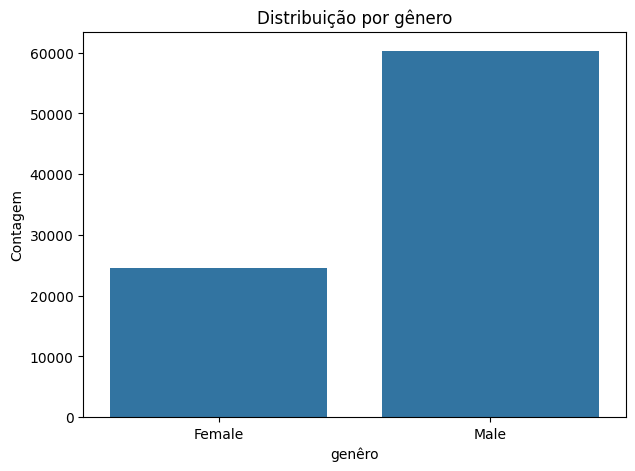

In [10]:
plt.figure(figsize=(7, 5))
# gráfico de barras simples
sns.countplot(x='Gender', data=df)
plt.title('Distribuição por gênero')
plt.xlabel('genêro')
plt.ylabel('Contagem')
plt.show()

Percebemos que a quantidade de homens é bem maior que a que de mulheres, o que mostra um claro desequilíbrio de análise por genêro.

Agora iremos verificar, através de histogramas, o comportamento das variáveis numéricas.

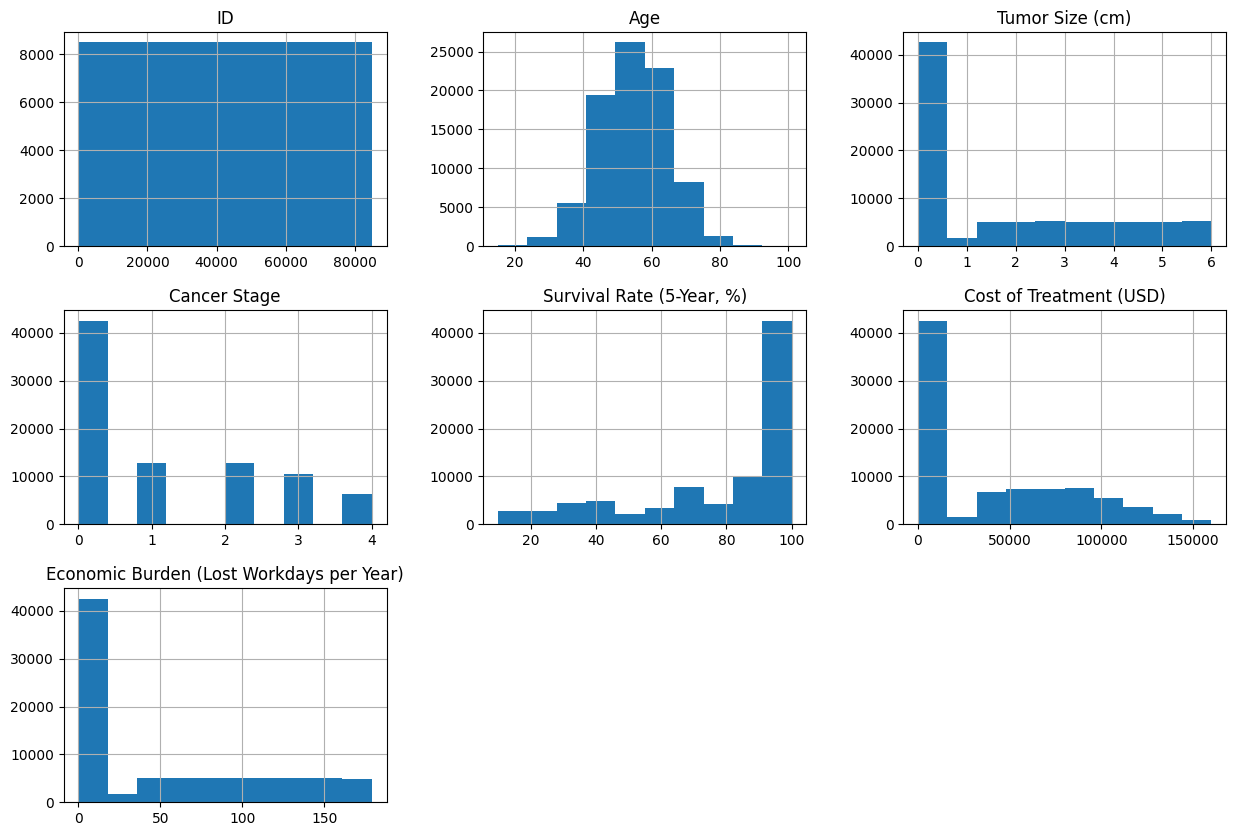

In [11]:
# Histograma
df.hist(figsize = (15,10))
plt.show()


Em seguida, vamos utilizar gráfico de densidade (*density plot*) para verificar a maior concentração de quantidade de algumas variáveis, como idade, por exemplo. Nela, verfica-se, conforme dito anteriormente, que há maior quantidade elementos com mais de 50 anos de idade.

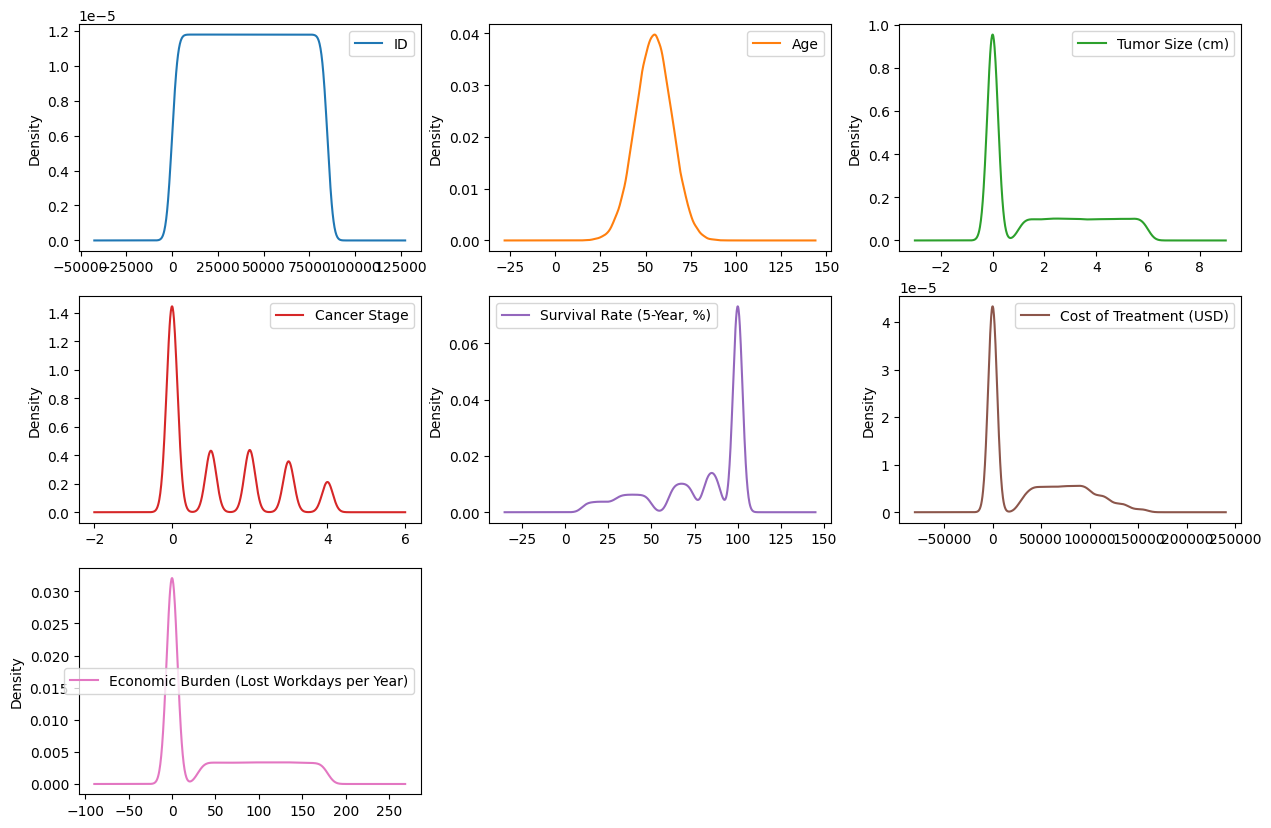

In [12]:
# Density Plot
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

Utilizando a biblioteca Seaborn, conseguimos verificar a relação entre as diferentes variáveis numéricas. Como a variável ID não relevante, foi excluída de nossa análise, através do comando drop.

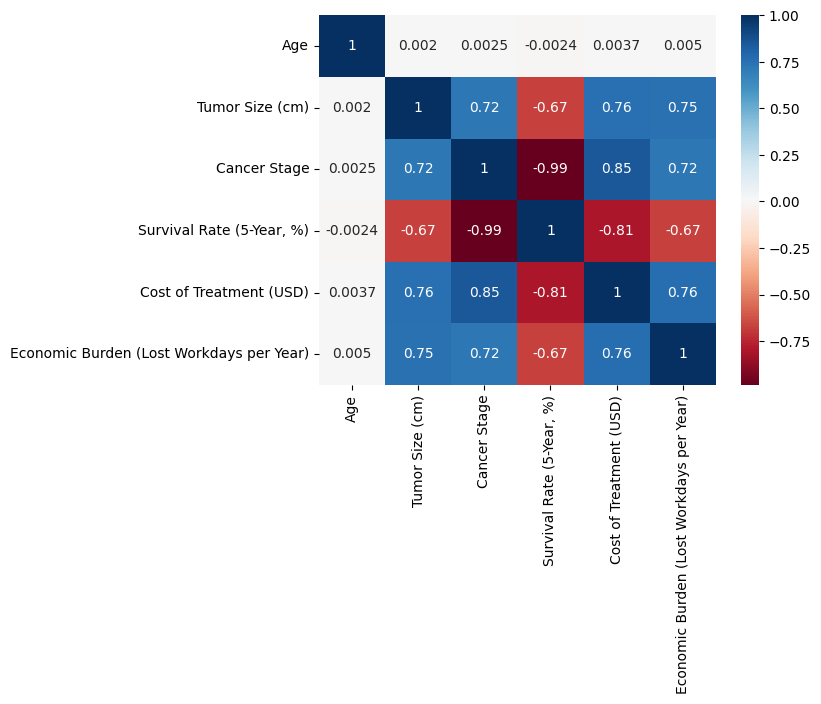

In [13]:
# Matriz de Correlação com Matplotlib Seaborn
numeric_cols = df.select_dtypes(include=np.number).drop('ID', axis=1)
sns.heatmap(numeric_cols.corr(), annot=True, cmap='RdBu');

Podemos verificar um alto grau de correlação entre a taxa de sobrevivência e estágio do câncer. Também uma correlação de alto grau é observada entre a taxa de sobrevivência e o custo de tratamento.

Podemos verificar essas relações nos gráficos abaixo, dentro dos quais elas são exibidas.

/tmp/ipython-input-14-1130171777.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cancer Stage', y='Cost of Treatment (USD)', palette='coolwarm')


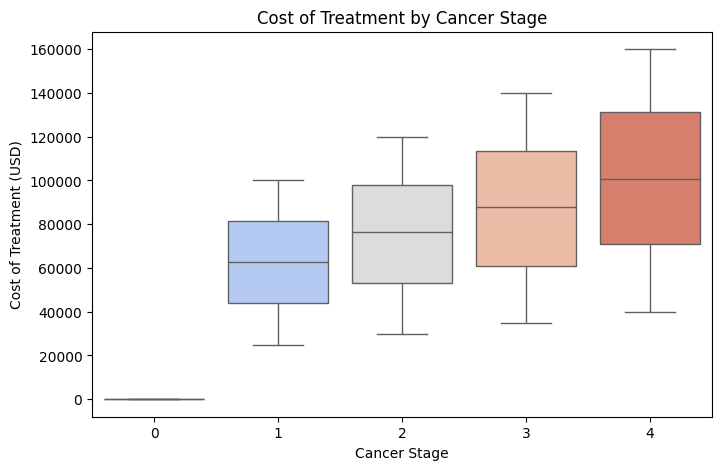

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Cancer Stage', y='Cost of Treatment (USD)', palette='coolwarm')
plt.title('Cost of Treatment by Cancer Stage')
plt.xlabel('Cancer Stage')
plt.ylabel('Cost of Treatment (USD)')
plt.show()

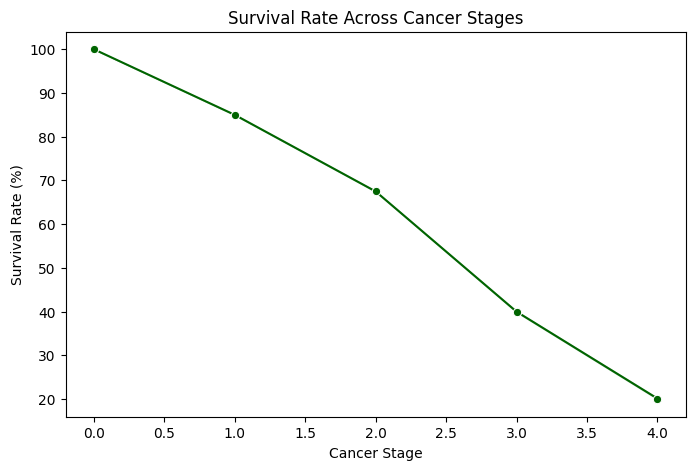

In [15]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='Cancer Stage', y='Survival Rate (5-Year, %)', marker='o', color='darkgreen')
plt.title('Survival Rate Across Cancer Stages')
plt.xlabel('Cancer Stage')
plt.ylabel('Survival Rate (%)')
plt.show()


Para as variáveis categóricas, verificamos que quase todas elas tem comportamento binário, de sim e não. Somente algumas se diferem um pouco, como Diet e Treatment Type.

In [16]:
categorical_cols = ['Country', 'Gender', 'Tobacco Use', 'Alcohol Consumption',
       'HPV Infection', 'Betel Quid Use', 'Chronic Sun Exposure',
       'Poor Oral Hygiene', 'Diet (Fruits & Vegetables Intake)',
       'Family History of Cancer', 'Compromised Immune System', 'Oral Lesions',
       'Unexplained Bleeding', 'Difficulty Swallowing',
       'White or Red Patches in Mouth', 'Treatment Type', 'Early Diagnosis',
       'Oral Cancer (Diagnosis)']

for col in categorical_cols:
    print(f'Unique values in {col}: {df[col].unique()}')

Unique values in Country: ['Italy' 'Japan' 'UK' 'Sri Lanka' 'South Africa' 'Taiwan' 'USA' 'Germany'
 'France' 'Australia' 'Brazil' 'Pakistan' 'Kenya' 'Russia' 'Nigeria'
 'Egypt' 'India']
Unique values in Gender: ['Female' 'Male']
Unique values in Tobacco Use: ['Yes' 'No']
Unique values in Alcohol Consumption: ['Yes' 'No']
Unique values in HPV Infection: ['Yes' 'No']
Unique values in Betel Quid Use: ['No' 'Yes']
Unique values in Chronic Sun Exposure: ['No' 'Yes']
Unique values in Poor Oral Hygiene: ['Yes' 'No']
Unique values in Diet (Fruits & Vegetables Intake): ['Low' 'High' 'Moderate']
Unique values in Family History of Cancer: ['No' 'Yes']
Unique values in Compromised Immune System: ['No' 'Yes']
Unique values in Oral Lesions: ['No' 'Yes']
Unique values in Unexplained Bleeding: ['No' 'Yes']
Unique values in Difficulty Swallowing: ['No' 'Yes']
Unique values in White or Red Patches in Mouth: ['No' 'Yes']
Unique values in Treatment Type: ['No Treatment' 'Surgery' 'Radiation' 'Targeted Th

Conseguimos então verificar as quantidades de cada uma dessa variáveis.

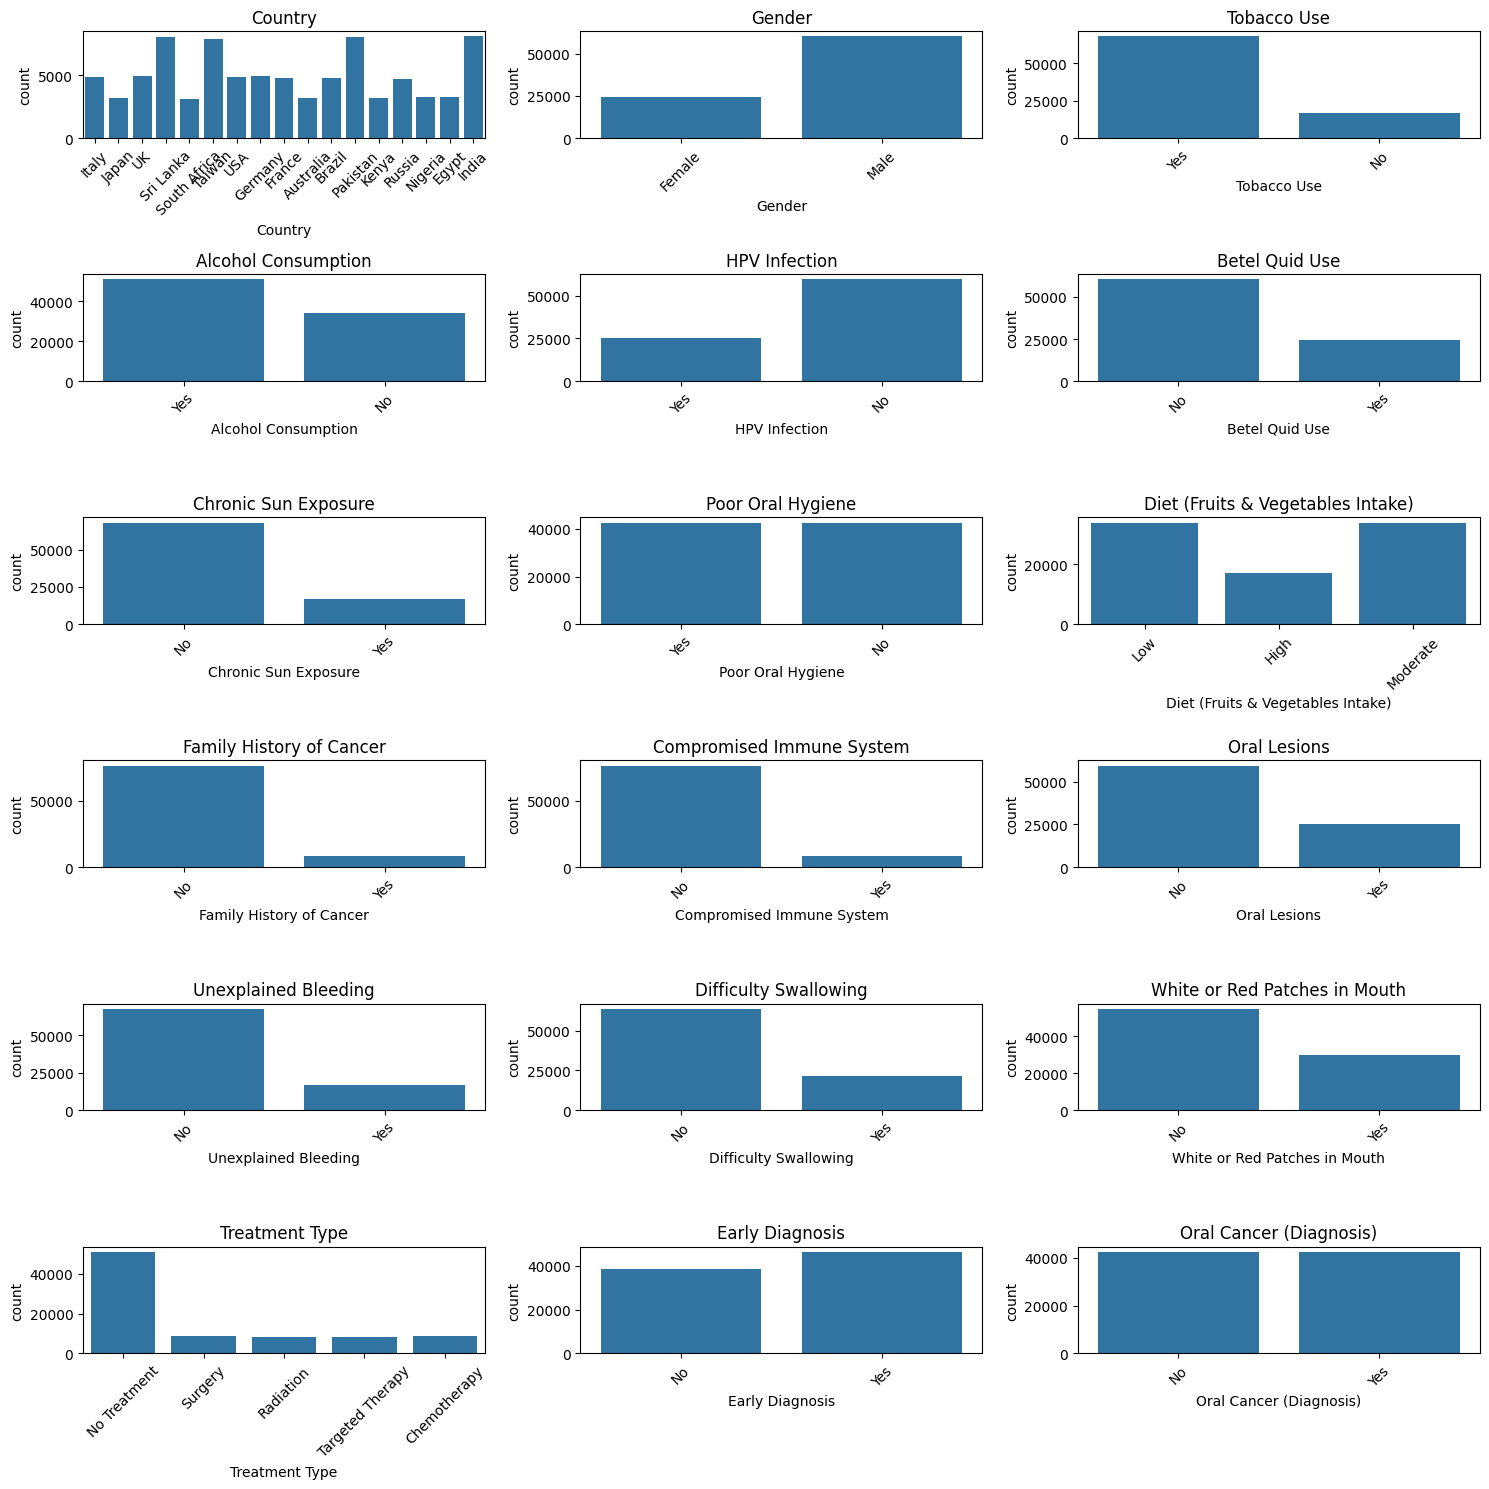

In [17]:
categorical_cols = ['Country', 'Gender', 'Tobacco Use', 'Alcohol Consumption',
       'HPV Infection', 'Betel Quid Use', 'Chronic Sun Exposure',
       'Poor Oral Hygiene', 'Diet (Fruits & Vegetables Intake)',
       'Family History of Cancer', 'Compromised Immune System', 'Oral Lesions',
       'Unexplained Bleeding', 'Difficulty Swallowing',
       'White or Red Patches in Mouth', 'Treatment Type', 'Early Diagnosis',
       'Oral Cancer (Diagnosis)']


plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(6, 3, i+1)
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
#numerical_col = df.select_dtypes(include=['int64', 'float64']).columns
#plt.figure(figsize=(15, 15))
#for i, col in enumerate(numerical_col):
#    plt.subplot(4, 2, i+1)
#    sns.histplot(data=df, x=col)
#    plt.title(col)
#    plt.xticks(rotation=45)
#plt.tight_layout()
#plt.show()

Conseguimos verificar também a quantidade de gênero de pessoas pesquisadas por país e perceber que que em todos eles, o gênero feminino é bem menos representativo.

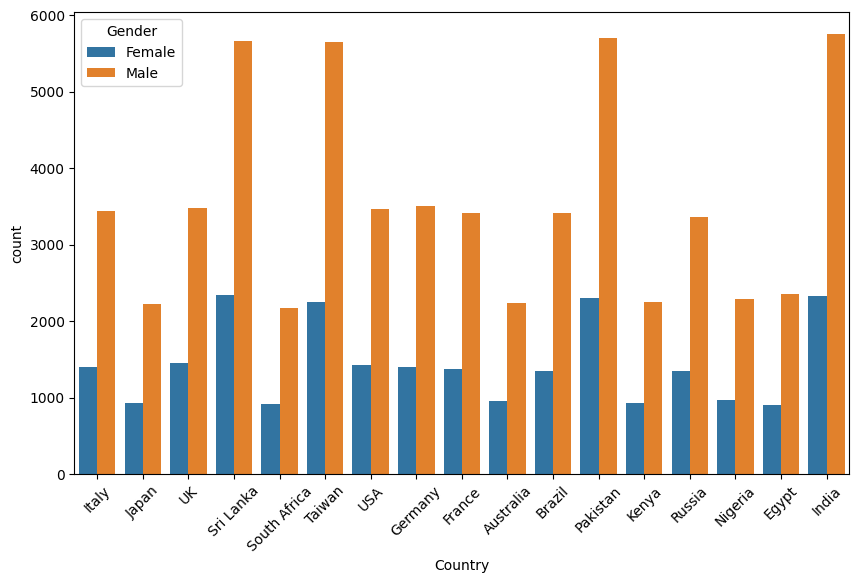

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Country', hue='Gender')
plt.xlabel('Country')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

Fazendo uma análise similar, agora com o diagnóstico de câncer, verificamos uma distribuição de casos positivos e negativos equilibrada. Além disso, concluímos que as maiores quantidades de amostras se concentraram na India, Taiwan, Sri Lanka e Paquistão.

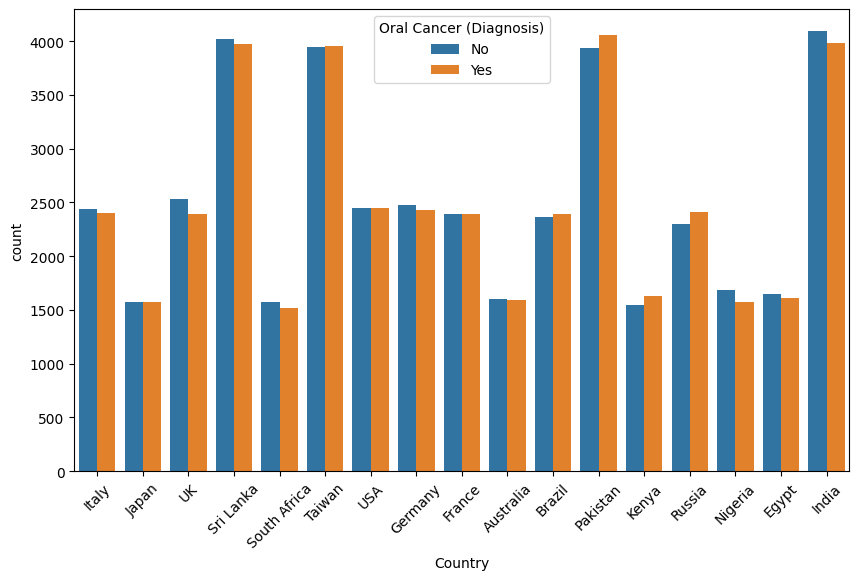

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Country', hue='Oral Cancer (Diagnosis)')
plt.xlabel('Country')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

Vamos verificar se há algum indício de relação entre o diagnóstico de câncer oral e hábito de consumo de tabaco.

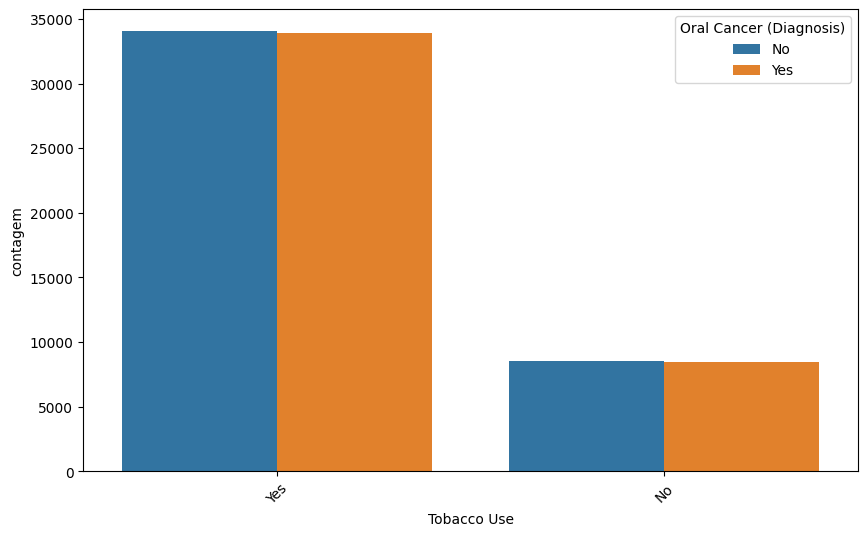

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Tobacco Use', hue='Oral Cancer (Diagnosis)')
plt.xlabel('Tobacco Use')
plt.ylabel('contagem')
plt.xticks(rotation=45)
plt.show()

Tanto no caso de diagnóstico positivo quanto negativo, o número de usuário de tabaco é qualse o mesmo. Isso não indica uma relação entre o tabaco e o câncer oral.

Aqui, vamos verificar se há algum indício de relação entre o diagnóstico de câncer oral e hábito de consumo de álcool.



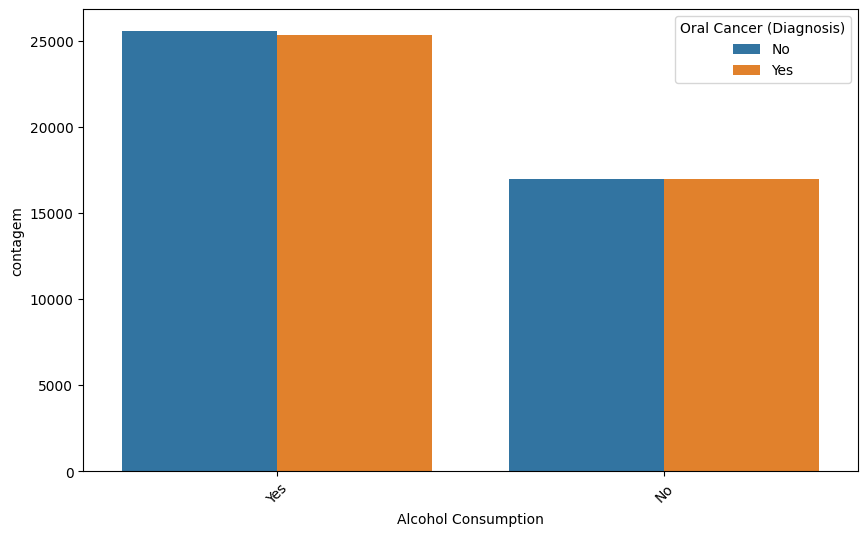

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Alcohol Consumption', hue='Oral Cancer (Diagnosis)')
plt.xlabel('Alcohol Consumption')
plt.ylabel('contagem')
plt.xticks(rotation=45)
plt.show()

Não há indício, pois o número de casos positivos e negativos de diagnóstico são iguais para todos os casos de consumo de álcool.

Verificação de indício de relaão entre tamanho do tumor e diagnóstico de câncer oral.

/tmp/ipython-input-23-3959700593.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tumor_oral_cancer = df.groupby(['Tumor Size Category', 'Oral Cancer (Diagnosis)']).size().reset_index(name='Counts')


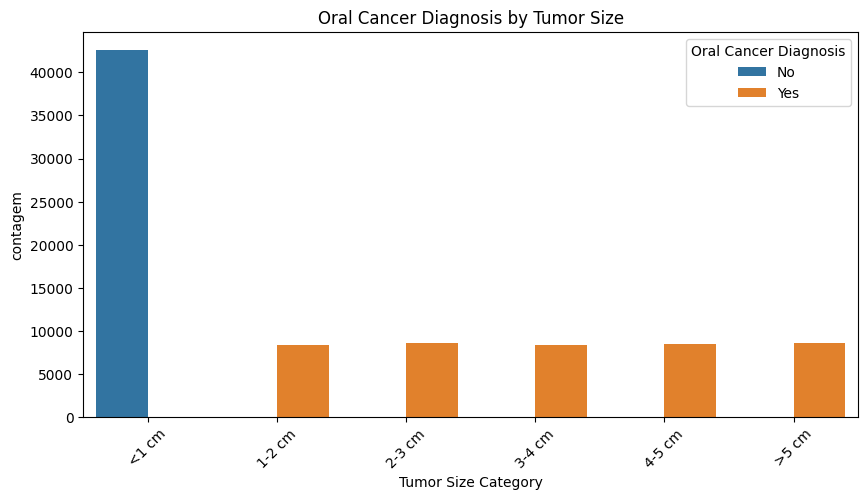

In [23]:
# Step 1: Create tumor size categories
bins = [0, 1, 2, 3, 4, 5, float('inf')]  # Adjust bins as needed
labels = ['<1 cm', '1-2 cm', '2-3 cm', '3-4 cm', '4-5 cm', '>5 cm']
df['Tumor Size Category'] = pd.cut(df['Tumor Size (cm)'], bins=bins, labels=labels, right=False)

# Step 2: Group by Tumor Size Category and Oral Cancer Diagnosis
tumor_oral_cancer = df.groupby(['Tumor Size Category', 'Oral Cancer (Diagnosis)']).size().reset_index(name='Counts')

# Step 3: Print the grouped data (optional)
#print(tumor_oral_cancer)

# Step 4: Create a count plot
plt.figure(figsize=(10, 5))
sns.barplot(data=tumor_oral_cancer, x='Tumor Size Category', y='Counts', hue='Oral Cancer (Diagnosis)')
plt.title('Oral Cancer Diagnosis by Tumor Size')
plt.xlabel('Tumor Size Category')
plt.ylabel('contagem')
plt.legend(title='Oral Cancer Diagnosis')
plt.xticks(rotation=45)
plt.show()

Pelo o que se pode ver no gráfico acima, tumores maiores que 1cm indicam câncer.

Verificando indício de relação entre pouca higiene oral e câncer oral.

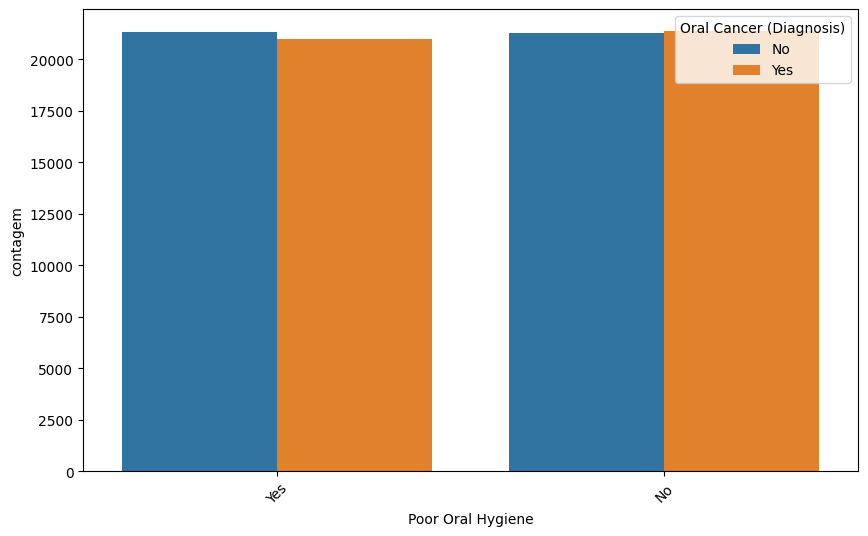

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Poor Oral Hygiene', hue='Oral Cancer (Diagnosis)')
plt.xlabel('Poor Oral Hygiene')
plt.ylabel('contagem')
plt.xticks(rotation=45)
plt.show()

Não há indício de relação.


Verificando indício de relação dieta de frutas e vegetais e câncer oral.



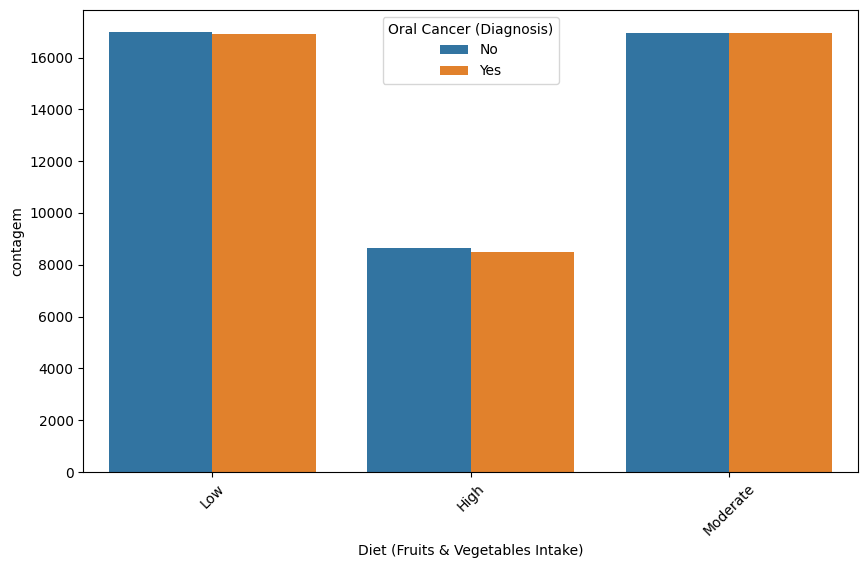

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Diet (Fruits & Vegetables Intake)', hue='Oral Cancer (Diagnosis)')
plt.xlabel('Diet (Fruits & Vegetables Intake)')
plt.ylabel('contagem')
plt.xticks(rotation=45)
plt.show()

Não há indício de relação.


Verificando indício de relação entre uso de Nogueira-de-Betel e câncer oral.

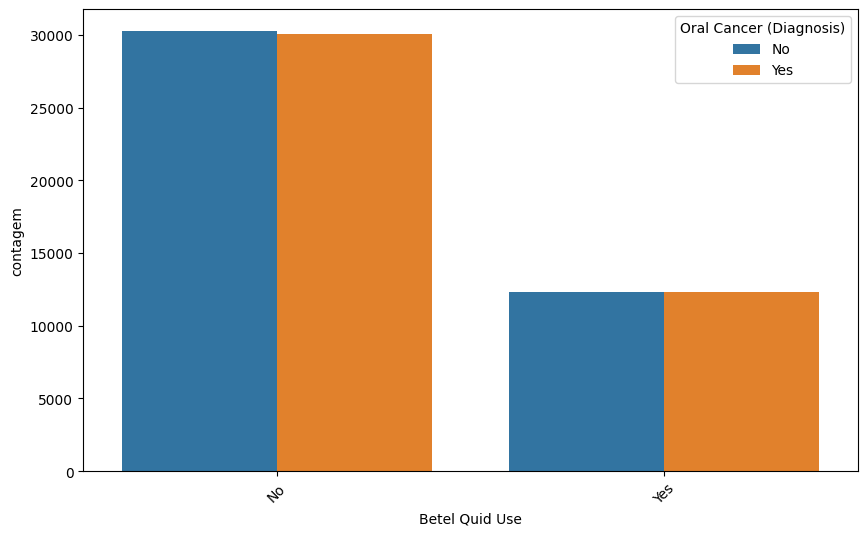

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Betel Quid Use', hue='Oral Cancer (Diagnosis)')
plt.xlabel('Betel Quid Use')
plt.ylabel('contagem')
plt.xticks(rotation=45)
plt.show()

Não há indício de relação.

Verificando indício de relação entre sistema imunológico comprometido e câncer oral

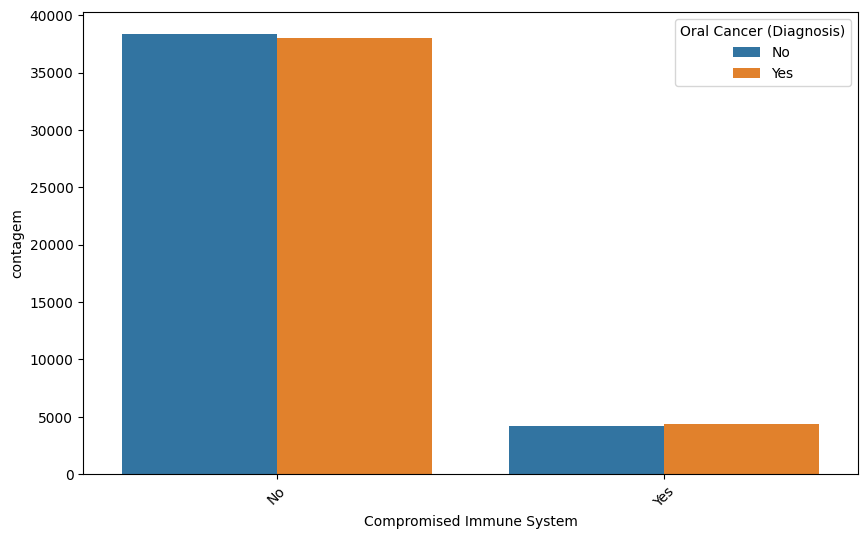

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Compromised Immune System', hue='Oral Cancer (Diagnosis)')
plt.xlabel('Compromised Immune System')
plt.ylabel('contagem')
plt.xticks(rotation=45)
plt.show()

Não há indício de relação.

Verificando indício de relação entre lesões na boca e câncer oral

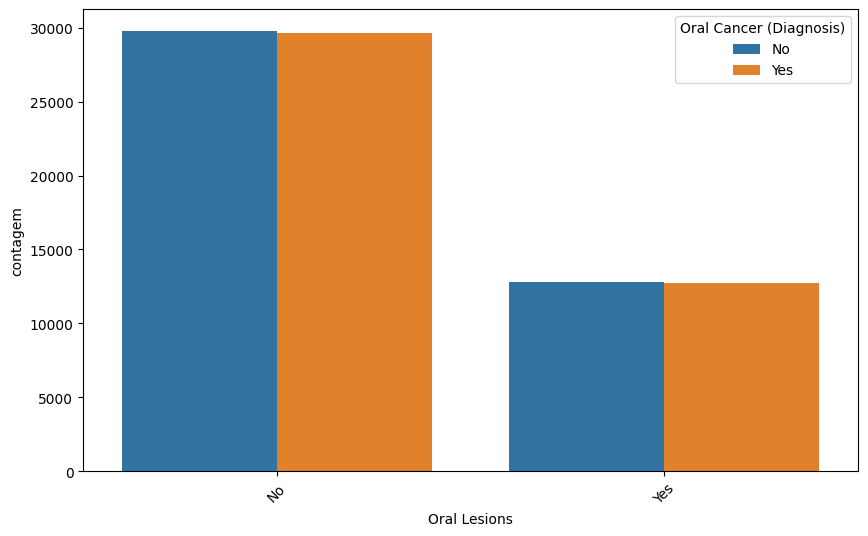

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Oral Lesions', hue='Oral Cancer (Diagnosis)')
plt.xlabel('Oral Lesions')
plt.ylabel('contagem')
plt.xticks(rotation=45)
plt.show()

Não há indício de relação.

## Pré-Processamento dos Dados

Aqui iremos realizar os procedimentos que preparam o banco de dados para ser usado em análise preditiva, com treinamento supervisionado.

Vamos verificar primeiramente se há dados nulos (missing ou NaN)

In [29]:
df.isnull().sum()

,0
ID,0
Country,0
Age,0
Gender,0
Tobacco Use,0
Alcohol Consumption,0
HPV Infection,0
Betel Quid Use,0
Chronic Sun Exposure,0
Poor Oral Hygiene,0


Em seguida, se há linha duplicadas.

In [30]:
df.duplicated().sum()

np.int64(0)

Agora, através do LabelEncoder da biblioteca sklearn, transformamos as variáveis categóricas em numéricas.

In [31]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

df.head()

,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,...,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis),Tumor Size Category
0,1,6,36,0,1,1,1,0,0,1,...,0,0.000000,0,1,100.000000,0.00,0,0,0,<1 cm
1,2,7,64,1,1,1,1,0,1,1,...,0,1.782186,1,1,83.340103,77772.50,177,0,1,1-2 cm
2,3,15,37,0,0,1,0,0,1,1,...,1,3.523895,2,3,63.222871,101164.50,130,1,1,3-4 cm
3,4,13,55,1,1,1,0,1,0,1,...,0,0.000000,0,1,100.000000,0.00,0,1,0,<1 cm
4,5,12,68,1,0,0,0,0,0,1,...,0,2.834789,3,1,44.293199,45354.75,52,0,1,2-3 cm


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84922 entries, 0 to 84921
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   ID                                        84922 non-null  int64   
 1   Country                                   84922 non-null  int64   
 2   Age                                       84922 non-null  int64   
 3   Gender                                    84922 non-null  int64   
 4   Tobacco Use                               84922 non-null  int64   
 5   Alcohol Consumption                       84922 non-null  int64   
 6   HPV Infection                             84922 non-null  int64   
 7   Betel Quid Use                            84922 non-null  int64   
 8   Chronic Sun Exposure                      84922 non-null  int64   
 9   Poor Oral Hygiene                         84922 non-null  int64   
 10  Diet (Fruits & Vegetab

Para a coluna Tumor Size Category, não é possível trabalhar com esses números sem algum tratamento.


In [33]:
# Mapeamento de categorias para valores numéricos
mapa_tamanho = {
    '<1 cm': 0.5,
    '1-2 cm': 1.5,
    '2-3 cm': 2.5,
    '3-4 cm': 3.5,
    '4-5 cm': 4.5,
    '>5 cm': 5.0
}

# Aplicar o mapeamento
df['Tumor Size Category'] = df['Tumor Size Category'].map(mapa_tamanho)

Banco de dados completo.

In [34]:
df.head()

,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,...,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis),Tumor Size Category
0,1,6,36,0,1,1,1,0,0,1,...,0,0.000000,0,1,100.000000,0.00,0,0,0,0.5
1,2,7,64,1,1,1,1,0,1,1,...,0,1.782186,1,1,83.340103,77772.50,177,0,1,1.5
2,3,15,37,0,0,1,0,0,1,1,...,1,3.523895,2,3,63.222871,101164.50,130,1,1,3.5
3,4,13,55,1,1,1,0,1,0,1,...,0,0.000000,0,1,100.000000,0.00,0,1,0,0.5
4,5,12,68,1,0,0,0,0,0,1,...,0,2.834789,3,1,44.293199,45354.75,52,0,1,2.5


Agora iremos dividir o banco de dados entre banco de treino e banco de teste(validação).

In [35]:
# Montar um DataFrame de atributos básicos, excluindo a coluna alvo 'target'
X = df.drop('Oral Cancer (Diagnosis)', axis=1)

# Montar um DataFrame com apenas a coluna alvo 'target'
y = df['Oral Cancer (Diagnosis)']

In [36]:
# Dividir dados em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualização X_train
print("Conjunto de Treino (X):")
print(X_train.head())

# Visualização y_train
print("\nConjunto de Treino (y):")
print(y_train.head())

# Visualização X_test
print("\nConjunto de Teste (X):")
print(X_test.head())

# Visualização y_test
print("\nConjunto de Teste (y):")
print(y_test.head())



Conjunto de Treino (X):
          ID  Country  Age  Gender  Tobacco Use  Alcohol Consumption  \
10837  10838       11   59       0            1                    1   
35307  35308       15   48       1            1                    1   
74950  74951        1   25       1            1                    0   
7355    7356       10   47       1            1                    0   
53286  53287        4   51       0            0                    1   

       HPV Infection  Betel Quid Use  Chronic Sun Exposure  Poor Oral Hygiene  \
10837              0               0                     0                  1   
35307              0               0                     0                  1   
74950              1               0                     0                  1   
7355               0               1                     0                  1   
53286              1               1                     0                  0   

       ...  Difficulty Swallowing  White or Red Patches 

Finalzmente, nós realizamos a normalização dos dados.

In [37]:

# Normalização

# Definindo o transformador como min max scaler
scaler = MinMaxScaler()

# Transformando os dados
scaledX_train = scaler.fit_transform(X_train)

# Transformando os dados
scaledX_test = scaler.fit_transform(X_test)

# Exibindo os dados transformados
print("Dados Originais:\n\n", X.values)
print("Dados Normalizados:\n\n", scaledX_train)

Dados Originais:

 [[1.0000e+00 6.0000e+00 3.6000e+01 ... 0.0000e+00 0.0000e+00 5.0000e-01]
 [2.0000e+00 7.0000e+00 6.4000e+01 ... 1.7700e+02 0.0000e+00 1.5000e+00]
 [3.0000e+00 1.5000e+01 3.7000e+01 ... 1.3000e+02 1.0000e+00 3.5000e+00]
 ...
 [8.4920e+04 1.4000e+01 7.2000e+01 ... 9.0000e+01 0.0000e+00 4.5000e+00]
 [8.4921e+04 7.0000e+00 6.7000e+01 ... 0.0000e+00 1.0000e+00 5.0000e-01]
 [8.4922e+04 1.0000e+01 7.5000e+01 ... 0.0000e+00 0.0000e+00 5.0000e-01]]
Dados Normalizados:

 [[0.12761423 0.6875     0.51162791 ... 0.         0.         0.        ]
 [0.41576778 0.9375     0.38372093 ... 0.         1.         0.        ]
 [0.88259538 0.0625     0.11627907 ... 0.36871508 0.         0.44444444]
 ...
 [0.90461611 0.3125     0.45348837 ... 0.         1.         0.        ]
 [0.01012718 0.625      0.46511628 ... 0.55865922 1.         0.88888889]
 [0.18599859 0.3125     0.34883721 ... 0.         1.         0.        ]]


## Conclusão

Podemos observar que apesar das muitas visualizações, a relação do correto diagnóstico de câncer oral com a maior parte das outras colunas não se mostrou muito clara, à exceção do tamanho do tumor. Em relação às colunas sobre consumo de álcool e de tabaco, também deve-se levar em consideração se há consumo exagerado ou não.
O Banco de dados utilizado já tinha sido tratado antes, uma vez que não há nenhuma linha duplicada ou com NaN.

Apesar da pouca informação adquirida pela visualização da maior parte das colunas em relação ao diagnóstico do câncer, após os procedimentos de pré-processamento  já descrito, é possível a implementação de um algoritmo de rede neural supervisionada.